## Combining the data

### Before running this file, you shall ensure that you have:

- run "Geospatial data.pynb" and have produced "geospatial_inside_denmark.csv"
- run "Public Transportation.ipynb" and produced "stations_inside_denmark.csv"
- run "Beaches.ipynb" and produced "beaches_inside_denmark.csv"

### This is important, because this file takes as input the three above csv files. Running the below code, will output a new csv file with the combined geospatial data.



In [1]:
import pandas as pd

# Load the data from the three CSV files into pandas DataFrames
stations_df = pd.read_csv("stations_inside_denmark.csv")
beaches_df = pd.read_csv("beaches_inside_denmark.csv")
geospatial_df = pd.read_csv("geospatial_inside_denmark.csv")

# Combine the three DataFrames into a single DataFrame
combined_df = pd.concat([stations_df, beaches_df, geospatial_df], ignore_index=True)

# Save the combined data to a new CSV file
combined_df.to_csv("combined_data_inside_denmark.csv", index=False)

print("Data from the three CSV files has been successfully combined and saved to 'combined_data_inside_denmark.csv'.")


Data from the three CSV files has been successfully combined and saved to 'combined_data_inside_denmark.csv'.


## Lets visualize our data!

In [9]:
pip install matplotlib basemap basemap-data-hires


Note: you may need to restart the kernel to use updated packages.


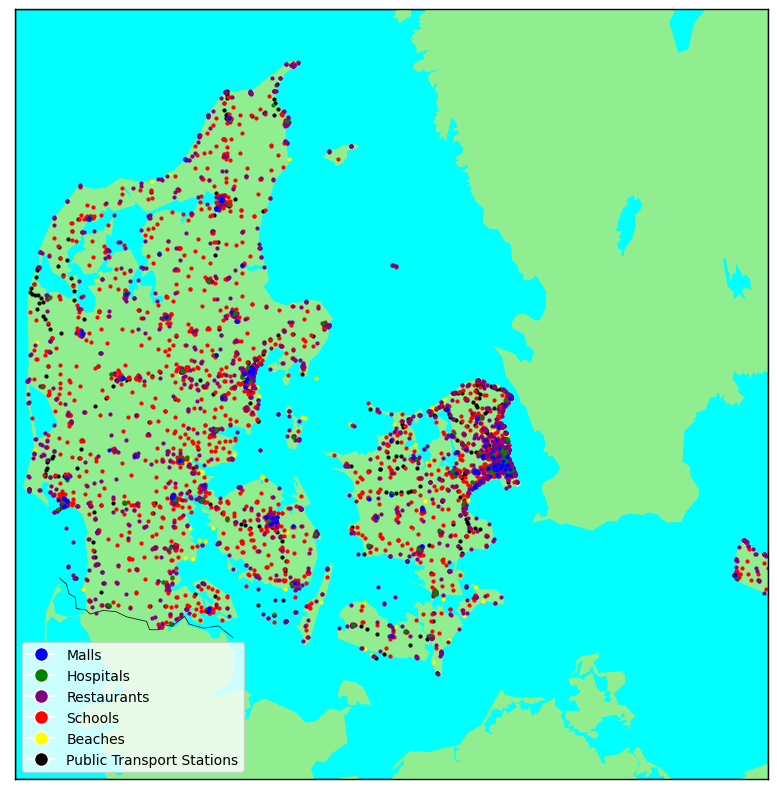

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the data
df = pd.read_csv("combined_data_inside_denmark.csv")

# Define a color mapping based on the Type
type_color_mapping = {
    "Malls": "blue",
    "Hospitals": "green",
    "Restaurants": "purple",
    "Schools": "red",
    "Beaches": "yellow",
    "Public Transport Stations": "black"
}

# Create a map focused on Denmark
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=54, urcrnrlat=58, llcrnrlon=8, urcrnrlon=15, resolution='i')
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen',lake_color='aqua')

# Plot the data points on the map
for idx, row in df.iterrows():
    color = type_color_mapping.get(row["Type"], "black")
    x, y = m(row["Longitude"], row["Latitude"])
    m.plot(x, y, 'o', color=color, markersize=2)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=type_) for type_, color in type_color_mapping.items()]
plt.legend(handles=legend_elements, loc='lower left')

#plt.title("Geospatial datapoints in Denmark")
plt.savefig("denmark_geospatial_data.png", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
pip install folium pandas


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import folium

# Load the data
df = pd.read_csv("combined_data_inside_denmark.csv")

# Initialize the map centered around Denmark
m = folium.Map(location=[56, 10.5], zoom_start=6, tiles='Stamen Terrain')

# Define a color mapping based on the Type
type_color_mapping = {
    "Malls": "blue",
    "Hospitals": "green",
    "Restaurants": "purple",
    "Schools": "red",
    "Beaches": "yellow",
    "Public Transport Stations": "cyan"
}

# Add points to the map
for idx, row in df.iterrows():
    color = type_color_mapping.get(row["Type"], "black")  # default to black if not found
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1.0
    ).add_to(m)

# Add a legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 150px; height: 180px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            ">
    &nbsp; Malls &nbsp; <i class="fa fa-circle" style="color:blue"></i><br>
    &nbsp; Hospitals &nbsp; <i class="fa fa-circle" style="color:green"></i><br>
    &nbsp; Restaurants &nbsp; <i class="fa fa-circle" style="color:purple"></i><br>
    &nbsp; Schools &nbsp; <i class="fa fa-circle" style="color:red"></i><br>
    &nbsp; Beaches &nbsp; <i class="fa fa-circle" style="color:yellow"></i><br>
    &nbsp; Public Transport &nbsp; <i class="fa fa-circle" style="color:cyan"></i>
</div>
'''


m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save("denmark_map.html")
